In [1]:
import numpy as np
import scvelo as scv
import pandas as pd
import loompy
import glob
import os
from scipy import io
%matplotlib inline
import matplotlib.pylab as plt
import scanpy as sc

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
import scipy

In [3]:
!ls -lh /scratch/gpfs/KANG/hirak/meisl_neuroblastoma/ThMYCN_210610/Files/het1_tumor/outs/velocyto/het1_tumor.loom

-rw-rw-r--. 1 hs0424 molbio 194M Aug 18 11:37 /scratch/gpfs/KANG/hirak/meisl_neuroblastoma/ThMYCN_210610/Files/het1_tumor/outs/velocyto/het1_tumor.loom


In [36]:
loom_data = dict()

In [37]:
loom_data['het1'] = scv.read('/scratch/gpfs/KANG/hirak/meisl_neuroblastoma/ThMYCN_210610/Files/het1_tumor/outs/velocyto/het1_tumor.loom')
loom_data['het5'] = scv.read('/scratch/gpfs/KANG/hirak/bayes/tenX_from_Thale/hemi_tumor_Jul_2024/velocyto/TH_MYCN_92.loom')

In [38]:
loom_data['het2'] = scv.read('/scratch/gpfs/KANG/hirak/meisl_neuroblastoma/ThMYCN_210610/Files/het2_tumor/outs/velocyto/het2_tumor.loom')
loom_data['het3'] = scv.read('/scratch/gpfs/KANG/hirak/bayes/tenX_from_Thale/hemi_tumor_Jul_2024/velocyto/TH_MYCN_38.loom')
loom_data['het4'] = scv.read('/scratch/gpfs/KANG/hirak/bayes/tenX_from_Thale/hemi_tumor_Jul_2024/velocyto/TH_MYCN_45.loom')


In [100]:
loom_data_homo = {}
loom_data_homo['homo1'] = scv.read('/scratch/gpfs/KANG/hirak/meisl_neuroblastoma/ThMYCN_210610/Files/homo1_tumor/outs/velocyto/homo1_tumor.loom')
loom_data_homo['homo2'] = scv.read('/scratch/gpfs/KANG/hirak/meisl_neuroblastoma/ThMYCN_210610/Files/homo2_tumor/outs/velocyto/homo2_tumor.loom')
loom_data_homo['homo3'] = scv.read('/scratch/gpfs/KANG/hirak/meisl_neuroblastoma/ThMYCN_210610/Files/homo3_tumor/outs/velocyto/homo3_tumor.loom')
loom_data_homo['no_6_PT'] = scv.read('/scratch/gpfs/KANG/hirak/bayes/tenX_from_Thale/organoid/velocyto/BEA23P055_2.loom')
loom_data_homo['no_50_PT'] = scv.read('/scratch/gpfs/KANG/hirak/bayes/tenX_from_Thale/organoid/velocyto/TH_MYCN_primary_tumor_no_50.loom')

In [26]:
hemi_names = list(loom_data.keys())

In [25]:
hemi_names = ['het1', 'het2', 'het3', 'het4', 'het5']

In [26]:
hemi_objs = dict()

In [27]:
store_dir = "/scratch/gpfs/KANG/hirak/mendel/Projects/neuroblastoma_analysis/results/velocity/5_sample/"

In [28]:
for name in hemi_names:
    # Define the directory for each object
    output_dir = os.path.join(store_dir, name)
    
    # File paths
    mtx_file = os.path.join(output_dir, f"{name}_matrix.mtx")
    barcodes_file = os.path.join(output_dir, f"{name}_barcodes.tsv")
    features_file = os.path.join(output_dir, f"{name}_features.tsv")
    umap_file = os.path.join(output_dir, f"{name}_umap.csv")
    metadata_file = os.path.join(output_dir, f"{name}_metadata.csv")
    
    # Read the MTX file (sparse matrix)
    matrix = scipy.io.mmread(mtx_file)
    
    # Read the barcodes (cell names)
    features = pd.read_csv(barcodes_file, header=None)[0].values
    
    # Read the features (gene names)
    barcodes = pd.read_csv(features_file, header=None)[0].values
    
    # Read the UMAP coordinates
    umap_df = pd.read_csv(umap_file, index_col=0)
    
    # Read the metadata
    metadata_df = pd.read_csv(metadata_file, index_col=0)
    
    # Create an AnnData object
    adata = sc.AnnData(X=matrix.T)
    
    # Set the observation names (cells) and variable names (genes)
    adata.obs_names = barcodes
    adata.var_names = features
    
    # Add metadata to AnnData
    adata.obs = metadata_df
    
    # Add UMAP embeddings
    adata.obsm['X_umap'] = umap_df.values
    
    hemi_objs[name] = adata.copy()
    
    print(f"AnnData object created and saved for {name}")

AnnData object created and saved for het1
AnnData object created and saved for het2
AnnData object created and saved for het3
AnnData object created and saved for het4
AnnData object created and saved for het5


In [101]:
homo_objs = dict()
for name in loom_data_homo.keys():
    # Define the directory for each object
    output_dir = os.path.join(store_dir, name)
    
    # File paths
    mtx_file = os.path.join(output_dir, f"{name}_matrix.mtx")
    barcodes_file = os.path.join(output_dir, f"{name}_barcodes.tsv")
    features_file = os.path.join(output_dir, f"{name}_features.tsv")
    umap_file = os.path.join(output_dir, f"{name}_umap.csv")
    metadata_file = os.path.join(output_dir, f"{name}_metadata.csv")
    
    # Read the MTX file (sparse matrix)
    matrix = scipy.io.mmread(mtx_file)
    
    # Read the barcodes (cell names)
    features = pd.read_csv(barcodes_file, header=None)[0].values
    
    # Read the features (gene names)
    barcodes = pd.read_csv(features_file, header=None)[0].values
    
    # Read the UMAP coordinates
    umap_df = pd.read_csv(umap_file, index_col=0)
    
    # Read the metadata
    metadata_df = pd.read_csv(metadata_file, index_col=0)
    
    # Create an AnnData object
    adata = sc.AnnData(X=matrix.T)
    
    # Set the observation names (cells) and variable names (genes)
    adata.obs_names = barcodes
    adata.var_names = features
    
    # Add metadata to AnnData
    adata.obs = metadata_df
    
    # Add UMAP embeddings
    adata.obsm['X_umap'] = umap_df.values
    
    homo_objs[name] = adata.copy()
    
    print(f"AnnData object created and saved for {name}")

AnnData object created and saved for homo1
AnnData object created and saved for homo2
AnnData object created and saved for homo3
AnnData object created and saved for no_6_PT
AnnData object created and saved for no_50_PT


In [33]:
adata

AnnData object with n_obs × n_vars = 6833 × 31411

In [34]:
barcodes

array(['MYCN', 'Xkr4', 'Gm1992', ..., 'mt-Nd5', 'mt-Nd6', 'mt-Cytb'],
      dtype=object)

In [35]:
features

array(['het2_tumor_AAACCCAAGACCATAA-1_2',
       'het2_tumor_AAACCCAAGATGGTCG-1_2',
       'het2_tumor_AAACCCAAGCTTTCTT-1_2', ...,
       'het2_tumor_TTTGTTGCATCGATAC-1_2',
       'het2_tumor_TTTGTTGGTCAGTCCG-1_2',
       'het2_tumor_TTTGTTGGTCCTCAGG-1_2'], dtype=object)

In [29]:
def convert_bad_cell_names(obs):
    obs['aux_pre'] = obs.index.str.split(':').str[0]
    obs['cell_barcode'] = obs.index.str.split(':').str[1].str[:-1]
    obs['tenx_cell_bar'] = obs.cell_barcode + '-1'
    obs['cell_id'] = obs.aux_pre + '_' + obs.cell_barcode + '-1'
    return obs.tenx_cell_bar.values

In [30]:
def convert_normal_cell_names(obs):
    return obs.index.str.split('_').str[0].values

In [31]:
def convert_andata_cell_names2(obs):
    return obs.index.str.split('_').str[-1].values

In [32]:
def convert_andata_cell_names(obs):
    return ([
        s.split('_')[-2] for s in list(obs.index)
    ])

In [33]:
convert_normal_cell_names(hemi_objs['het3'].obs)

array(['AAACCCAAGGAAAGAC-1', 'AAACCCACACCATTCC-1', 'AAACCCACACTGTTCC-1',
       ..., 'TTTGTTGTCCATCACC-1', 'TTTGTTGTCGAGATAA-1',
       'TTTGTTGTCGCAATGT-1'], dtype=object)

In [39]:
## Read cell names
adata_dict = {}
for name in ['het1', 'het2'] :
    loom_x = loom_data[name].copy()
    adata = hemi_objs[name].copy()
    adata.X = adata.X.tocsr()
    adata.obs.index = convert_andata_cell_names(adata.obs)
    loom_x.obs.index = convert_bad_cell_names(loom_x.obs)
    gene_list = loom_x.var.index.str.split('_').str[1].tolist()[:-1] + ['MYCN']
    loom_x.var.index = gene_list
    print(name, len(set(adata.obs.index).intersection(loom_x.obs.index)))
    adata = scv.utils.merge(adata, loom_x)
    adata_dict[name] = adata.copy()

het1 12856
het2 6833


In [40]:
for name in ['het3', 'het4', 'het5'] :
    loom_x = loom_data[name].copy()
    adata = hemi_objs[name].copy()
    adata.X = adata.X.tocsr()
    adata.obs.index = convert_andata_cell_names(adata.obs)
    loom_x.obs.index = convert_bad_cell_names(loom_x.obs)
    gene_list = loom_x.var.index.str.split('_').str[1].tolist()[:-1] + ['MYCN']
    loom_x.var.index = gene_list
    print(name, len(set(adata.obs.index).intersection(loom_x.obs.index)))
    adata = scv.utils.merge(adata, loom_x)
    adata_dict[name] = adata.copy()

het3 12546
het4 13317
het5 12316


In [148]:
for name in ['homo1', 'homo2', 'homo3']:
    loom_x = loom_data_homo[name].copy()
    adata = homo_objs[name].copy()
    adata.X = adata.X.tocsr()
    adata.obs.index = convert_andata_cell_names2(adata.obs)
    loom_x.obs.index = convert_bad_cell_names(loom_x.obs)
    gene_list = loom_x.var.index.str.split('_').str[1].tolist()[:-1] + ['MYCN']
    loom_x.var.index = gene_list
    print(name, len(set(adata.obs.index).intersection(loom_x.obs.index)))
    adata = scv.utils.merge(adata, loom_x)
    adata_dict[name] = adata.copy()

homo1 6860
homo2 4058
homo3 11725


In [149]:
for name in ['no_6_PT', 'no_50_PT']:
    loom_x = loom_data_homo[name].copy()
    adata = homo_objs[name].copy()
    adata.X = adata.X.tocsr()
    adata.obs.index = convert_normal_cell_names(adata.obs)
    loom_x.obs.index = convert_bad_cell_names(loom_x.obs)
    gene_list = loom_x.var.index.str.split('_').str[1].tolist()[:-1] + ['MYCN']
    loom_x.var.index = gene_list
    print(name, len(set(adata.obs.index).intersection(loom_x.obs.index)))
    adata = scv.utils.merge(adata, loom_x)
    adata_dict[name] = adata.copy()

no_6_PT 10473
no_50_PT 8314


In [150]:
adata_dict.keys()

dict_keys(['het1', 'het2', 'het3', 'het4', 'het5', 'homo1', 'homo2', 'homo3', 'no_6_PT', 'no_50_PT'])

In [ ]:
for name in samples:
    print(name)
    adata_dict[name].write_h5ad(store_dir + f'{name}_velocyto.h5ad')

In [4]:
samples = ['het1', 'het2', 'het3', 'het4', 'het5', 'homo1', 'homo2', 'homo3', 'no_6_PT', 'no_50_PT']

In [5]:
adata_dict = {}

In [9]:
for name in samples:
    print(name)
    adata_dict[name] = sc.read_h5ad(store_dir + f'{name}_velocyto.h5ad')

het1
het2
het3
het4
het5
homo1
homo2
homo3
no_6_PT
no_50_PT


In [10]:
adata_dict

{'het1': AnnData object with n_obs × n_vars = 12856 × 31374
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'integrated_snn_res.0.5', 'seurat_clusters', 'integrated_snn_res.0.3', 'annot', 'adrn_score1', 'UMAP_1', 'UMAP_2', 'annot.rename', 'scDblFinder.class', 'scDblFinder.score', 'aux_pre', 'cell_barcode', 'tenx_cell_bar', 'cell_id', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
     obsm: 'X_umap'
     layers: 'ambiguous', 'matrix', 'spliced', 'unspliced',
 'het2': AnnData object with n_obs × n_vars = 6833 × 31374
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'integrated_snn_res.0.5', 'seurat_clusters', 'integrated_snn_res.0.3', 'annot', 'adrn_score1', 'UMAP_1', 'UMAP_2', 'annot.rename', 'scDblFinder.class', 'scDblFinder.score', 'aux_pre', 'cell_barcode', 'tenx_cell_bar', 'cell_id', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size'
     var: 'Access

In [11]:
adata_velocity_dict = {}

In [12]:
for name in adata_dict.keys():
    Neutro3p = adata_dict[name].copy()
    scv.pp.filter_and_normalize(Neutro3p, min_shared_counts=30, n_top_genes=2000)
    scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
    
    scv.tl.recover_dynamics(Neutro3p)
    scv.tl.velocity(Neutro3p, mode='dynamical')
    scv.tl.velocity_graph(Neutro3p)
    scv.tl.recover_latent_time(Neutro3p)
    adata_velocity_dict[name] = Neutro3p.copy()

Filtered out 24101 genes that are detected 30 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:27) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:11:26) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:05) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:17) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 5 regions of root cells and 2 regions of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusi

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:08:44) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 3 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:01:35) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 6 regions of root cells and 1 region of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells 

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:04:47) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 3 regions of root cells and 2 regions of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:02:37) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 3 regions of root cells and 2 regions of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:06:00) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:08) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells 

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:06:15) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 2 regions of root cells and 4 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:07:48) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 6 regions of root cells and 2 regions of end points .
    finished (0:00:02) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:08:09) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:01) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells 

/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_194429/3698692574.py:4: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(Neutro3p, n_pcs=30, n_neighbors=30)
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(
/scratch/gpfs/KANG/hirak/mambaforge/envs/r43/lib/python3.11/site-packages/scvelo/preprocessing/neighbors.py:233: DeprecationWarning: Automatic computation of PCA is deprecated si

computing neighbors
    finished (0:00:01) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 1/48 cores)
    finished (0:06:11) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/48 cores)
    finished (0:00:10) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 3 regions of root cells and 3 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells

In [13]:
for name in samples:
    print(name)
    adata_velocity_dict[name].write_h5ad(store_dir + f'{name}_velocyto_computed.h5ad')

het1
het2
het3
het4
het5
homo1
homo2
homo3
no_6_PT
no_50_PT


In [59]:
for name in samples:
    print(name)
    adata_velocity_dict[name] = sc.read_h5ad(store_dir + f'{name}_velocyto_computed.h5ad')

het1
het2
het3
het4
het5
homo1
homo2
homo3
no_6_PT
no_50_PT


In [60]:
for name in ['het1', 'het2', 'het3', 'het4', 'het5']:
    if(np.all(adata_velocity_dict[name].obs_names == adata_dict[name].obs_names)):
        for c in ['S.Score', 'G2M.Score','Phase']:
            adata_velocity_dict[name].obs.loc[:,c] = adata_dict[name].obs.loc[:,c]

In [61]:
adata_dict['het1'].obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt',
       'integrated_snn_res.0.5', 'seurat_clusters', 'integrated_snn_res.0.3',
       'annot', 'adrn_score1', 'UMAP_1', 'UMAP_2', 'annot.rename',
       'scDblFinder.class', 'scDblFinder.score', 'S.Score', 'G2M.Score',
       'Phase', 'old.ident', 'aux_pre', 'cell_barcode', 'tenx_cell_bar',
       'cell_id', 'initial_size_unspliced', 'initial_size_spliced',
       'initial_size'],
      dtype='object')

In [62]:
phase_code_dict = {
    'G2M': '#F8766D',
    'G1': '#00BA38',
    'S': '#619CFF'
}

In [63]:
samples

['het1',
 'het2',
 'het3',
 'het4',
 'het5',
 'homo1',
 'homo2',
 'homo3',
 'no_6_PT',
 'no_50_PT']

In [64]:
#[phase_code_dict[c] for c in adata_velocity_dict[samples[i]].obs.Phase.values]

computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


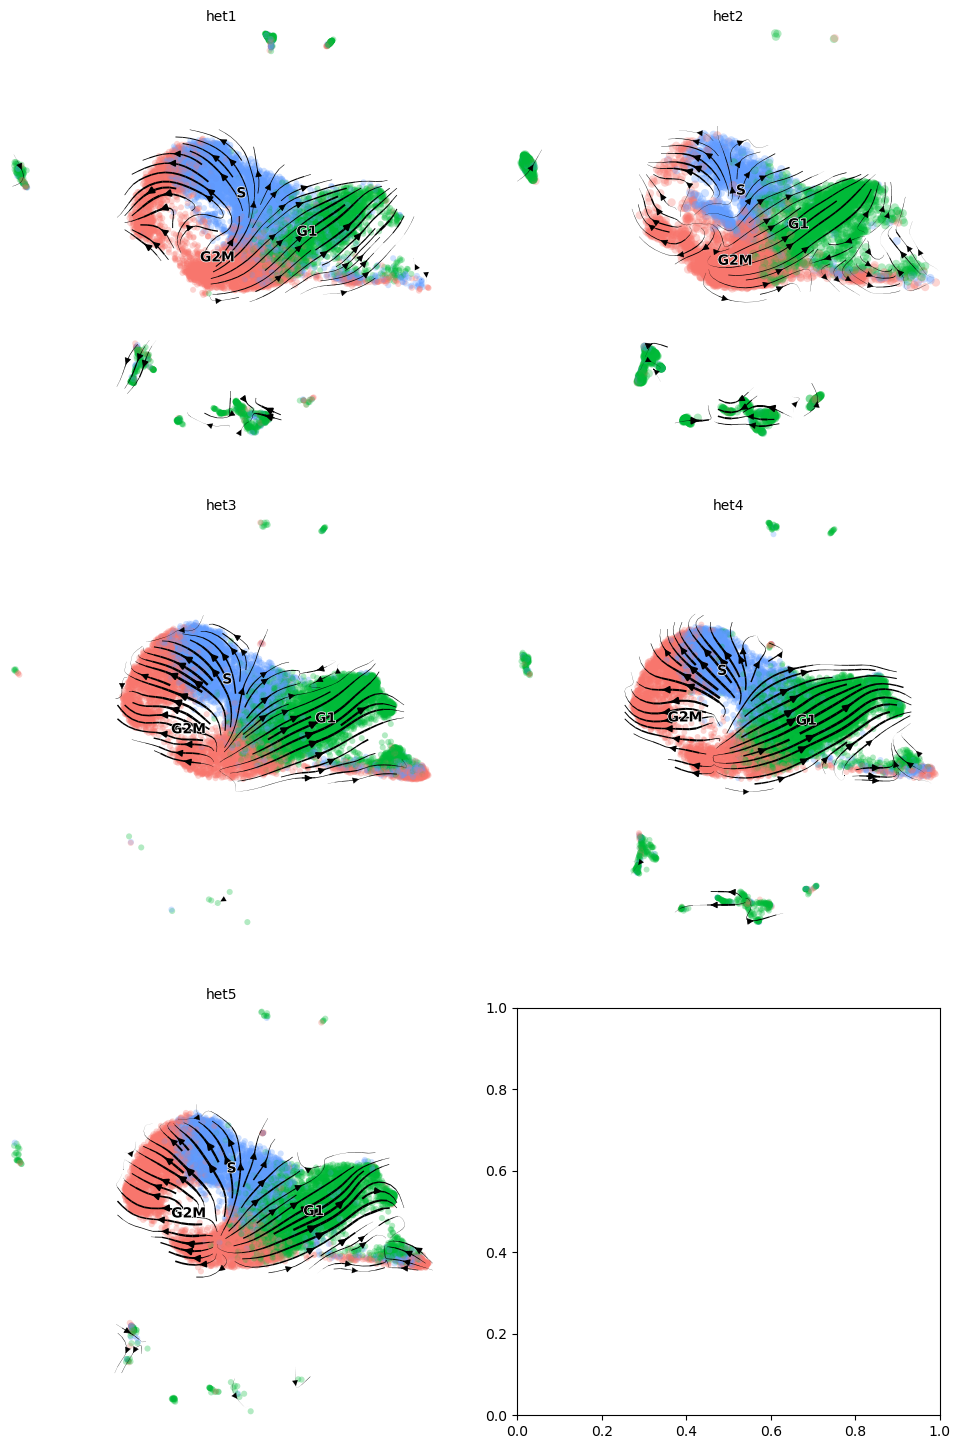

In [65]:
fig, ax = plt.subplots(3,2,figsize=(12,18))

for i in range(5):
    r = int(i / 2)
    c = i % 2
    #print(r,c)
    adata_velocity_dict[samples[i]].obs.loc[:,'clusters'] =  adata_velocity_dict[samples[i]].obs.Phase.values
    scv.pl.velocity_embedding_stream(
        adata_velocity_dict[samples[i]],
        legend_loc='on data', 
        title=samples[i],
        palette = [phase_code_dict[c] for c in adata_velocity_dict[samples[i]].obs.Phase.values],
        basis='umap', 
        dpi=300,
        ax = ax[r,c],
        show = False
    )
    
plt.show()

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


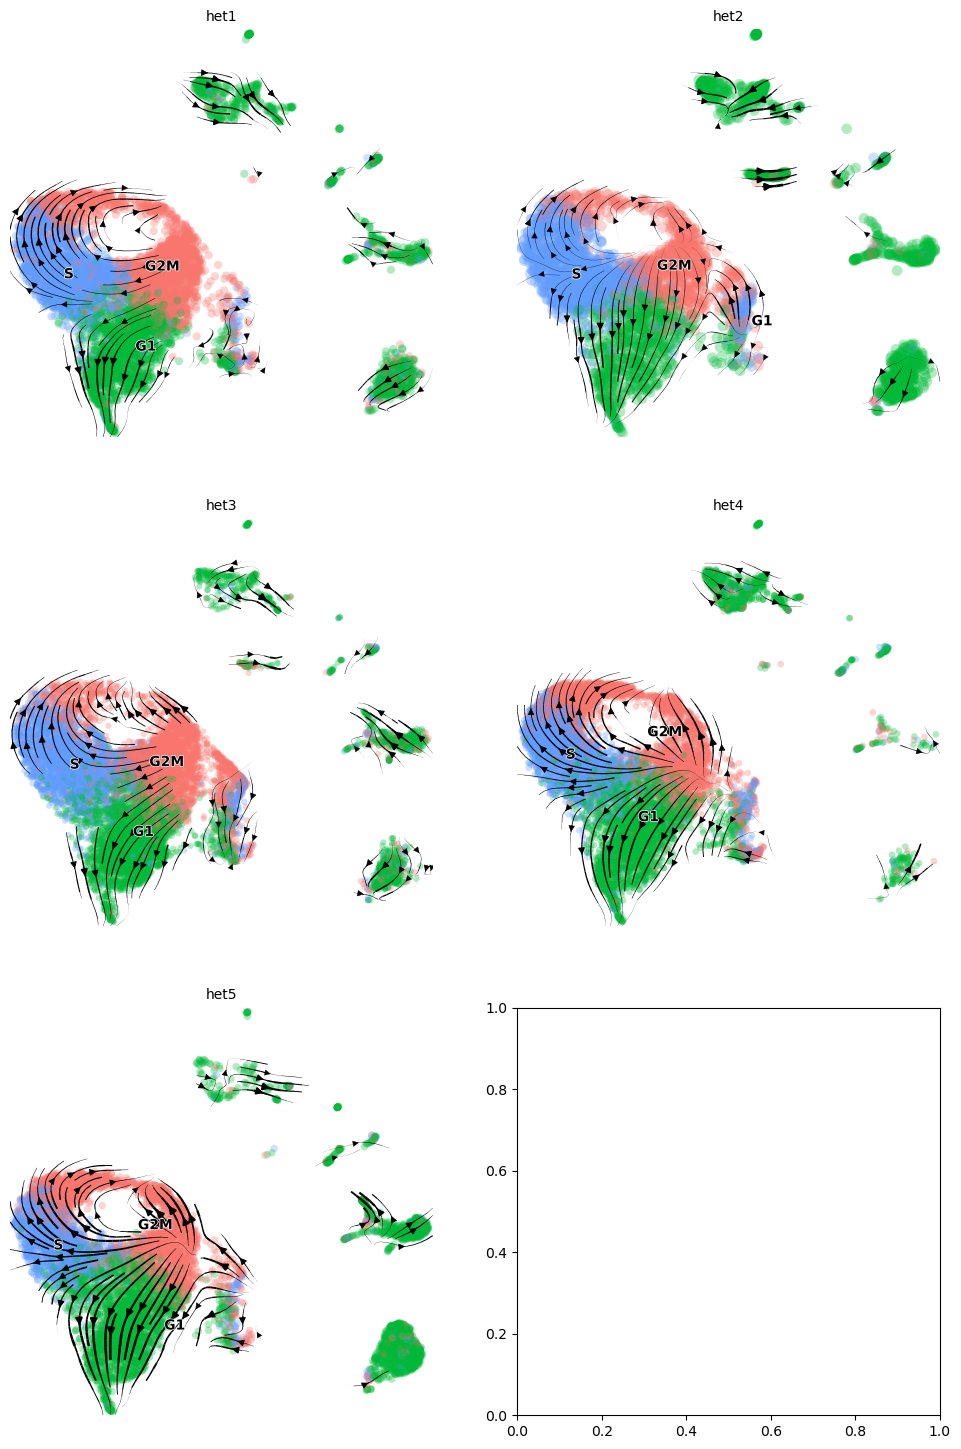

In [67]:
fig, ax = plt.subplots(3,2,figsize=(12,18))

for i in range(5):
    r = int(i / 2)
    c = i % 2
    #print(r,c)
    adata_velocity_dict[samples[5+i]].obs.loc[:,'clusters'] =  adata_velocity_dict[samples[5+i]].obs.Phase.values
    scv.pl.velocity_embedding_stream(
        adata_velocity_dict[samples[5+i]],
        legend_loc='on data', 
        title=samples[i],
        palette = [phase_code_dict[c] for c in adata_velocity_dict[samples[5+i]].obs.Phase.values],
        basis='umap', 
        dpi=300,
        ax = ax[r,c],
        show = False
    )
    
plt.show()

In [68]:
pan = scv.datasets.pancreas()

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50.0M/50.0M [00:00<00:00, 290MB/s]


In [71]:
pan

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

In [75]:
adata_velocity_dict['het1'].obs[]

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,integrated_snn_res.0.5,seurat_clusters,integrated_snn_res.0.3,annot,adrn_score1,UMAP_1,...,n_counts,velocity_self_transition,root_cells,end_points,velocity_pseudotime,latent_time,S.Score,G2M.Score,Phase,clusters
AAACCCAAGCTTTCCC-1,het1,4684,2393,3.810926,0,0,9,S phase Sympathoblasts,0.224730,-4.732944,...,3111.952148,0.260863,0.005646,0.424006,0.590926,0.443429,0.470802,0.512431,G2M,G2M
AAACCCAAGGCGTTAG-1,het1,4041,2175,4.574907,1,1,1,Sympathoblasts,0.423461,2.654133,...,3049.747803,0.457330,0.002577,0.086630,0.046188,0.428434,-0.067706,-0.190411,G1,G1
AAACCCACAATCTCGA-1,het1,2337,1365,2.419355,12,12,22,Endothelial cells,0.097429,2.033597,...,2686.769775,0.194541,0.665718,0.000014,0.643532,0.680126,-0.270843,-0.240450,G1,G1
AAACCCACACCAAAGG-1,het1,5719,2817,4.676617,0,0,9,S phase Sympathoblasts,0.514374,-4.856750,...,3048.766113,0.374583,0.002343,0.797334,0.783611,0.445575,0.351781,0.542646,G2M,G2M
AAACCCAGTCGAACAG-1,het1,4549,2283,5.868777,2,2,6,Sympathoblasts,0.229519,1.441997,...,3015.933105,0.492701,0.004756,0.125471,0.142103,0.453572,0.200926,-0.200856,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTATCGTAC-1,het1,5153,2566,4.038847,0,0,3,S phase Sympathoblasts,0.464017,-1.778306,...,3036.669678,0.443317,0.003265,0.259632,0.242008,0.405003,0.385879,0.177544,S,S
TTTGTTGGTTTCGGCG-1,het1,1221,831,6.445672,4,4,16,M phase Sympathoblasts,-0.155782,2.356499,...,2904.726807,0.489399,0.954278,0.000198,0.156234,0.518672,0.024175,0.761076,G2M,G2M
TTTGTTGTCCATTTCA-1,het1,2885,1816,6.670238,0,0,10,S phase Sympathoblasts,0.613135,-3.897081,...,2995.386475,0.200189,0.019152,0.218127,0.256579,0.445353,0.390366,0.255787,S,S
TTTGTTGTCTCATTGT-1,het1,2149,1432,7.369535,11,11,18,Chromaffin cells,0.732983,8.628943,...,2925.910400,0.427501,0.001273,0.510552,0.119662,0.545115,-0.130819,-0.398739,G1,G1


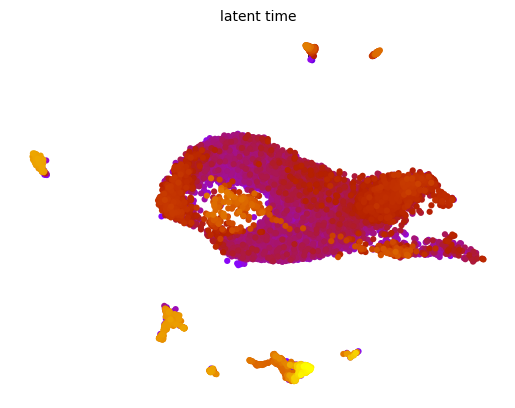

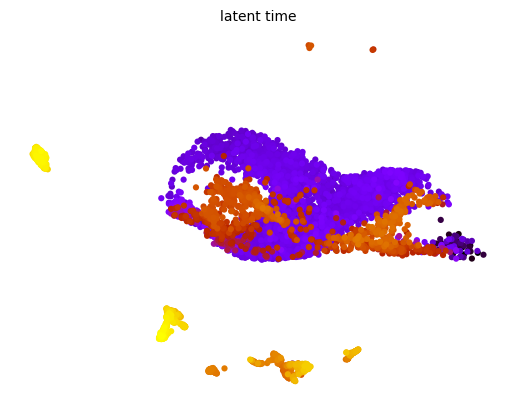

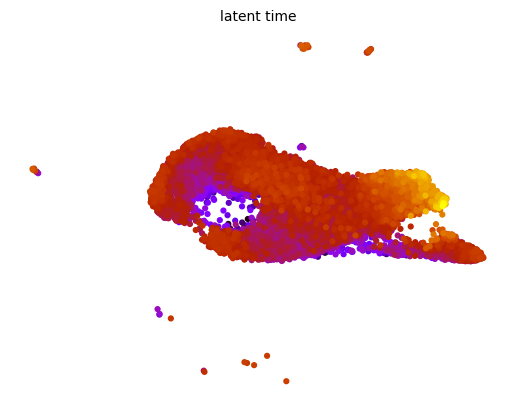

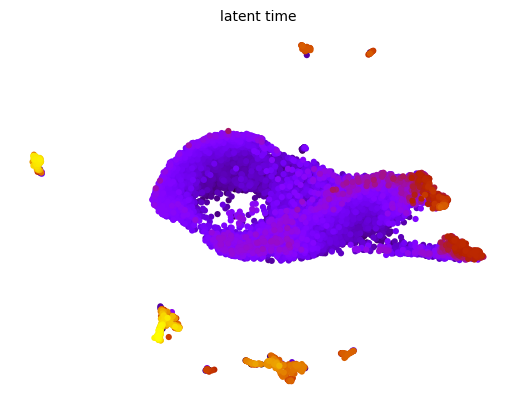

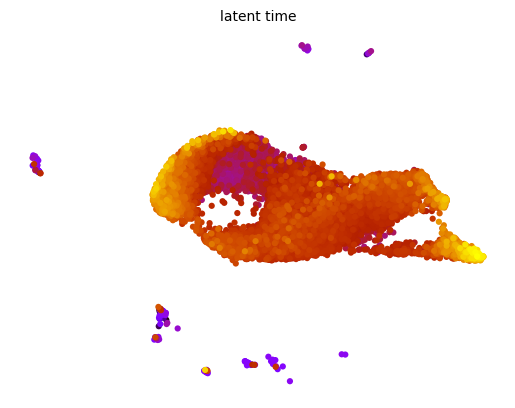

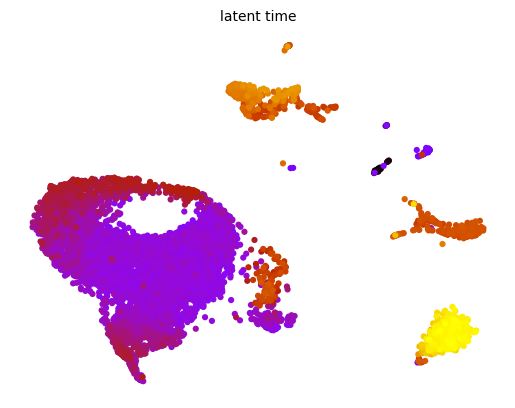

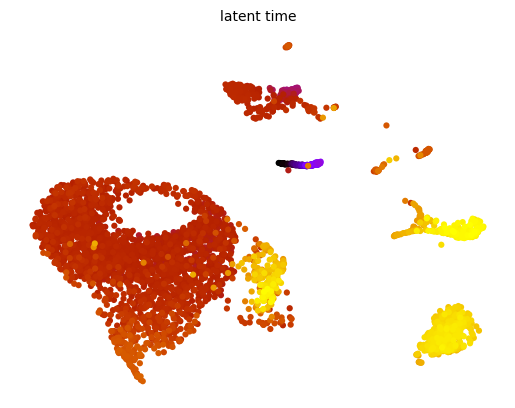

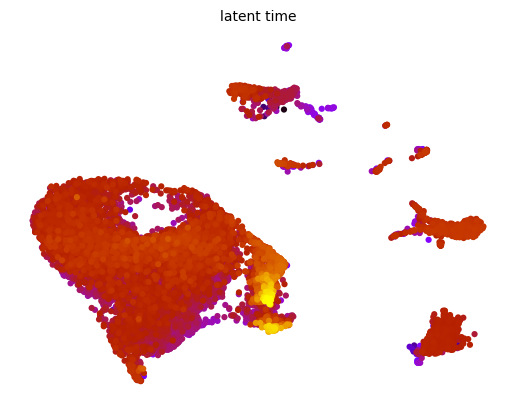

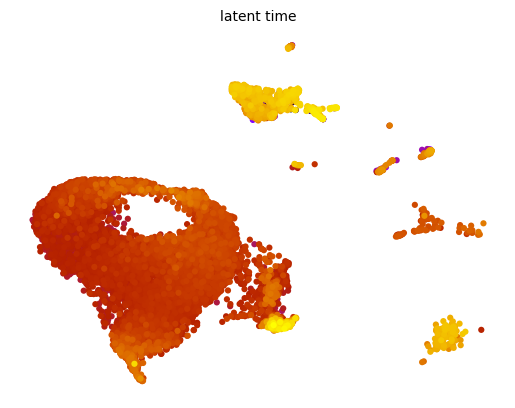

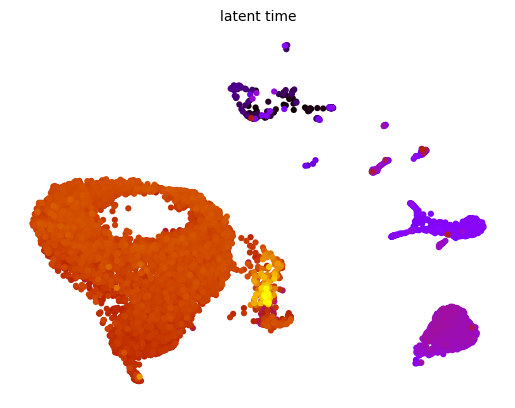

In [80]:
for name in samples:
    scv.pl.scatter(adata_velocity_dict[name], color='latent_time', color_map='gnuplot',size=80, colorbar=False)